# Lattice QCD: Scale Setting with Wilson Loops and Plaquette Analysis

This notebook demonstrates how to set the scale in lattice QCD using Wilson loops and analyzes how the average value of the square plaquette changes as a function of the coupling constant ($\beta$).

In [1]:
# Section 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Global lattice parameters
L = 4      # Lattice size (can be changed for larger studies)
Nc = 3     # Number of colors for SU(3)

In [23]:
# Number of Monte Carlo sweeps for each beta
n_sweeps = 50  # You can increase for better statistics

In [2]:
# Section 2: Define Lattice and Coupling Parameters
lattice_size = 4  # 4x4x4x4 lattice
n_beta = 7
betas = np.linspace(5.4, 6.0, n_beta)

In [3]:
# Section 3: Compute Wilson Loops
# For demonstration, we use a simple exponential decay for Wilson loops
wilson_loop_sizes = [(1,1), (2,2), (3,3)]
wilson_loops = {size: [] for size in wilson_loop_sizes}

for beta in betas:
    # In a real simulation, compute Wilson loops using the gauge field
    for size in wilson_loop_sizes:
        area = size[0] * size[1]
        # Example: Wilson loop value decays exponentially with area and depends on beta
        W = np.exp(-0.25 * area * (6.0/beta))
        wilson_loops[size].append(W)

In [4]:
# Section 4: Calculate Average Square Plaquette Value
plaquette_values = []
for beta in betas:
    # In a real simulation, calculate from gauge field
    # Here, we use a simple model: higher beta yields higher plaquette
    P = 1 - 1/(beta)
    plaquette_values.append(P)

In [5]:
# Section 5: Analyze Plaquette Value vs Coupling
for i, beta in enumerate(betas):
    print(f"Beta: {beta:.2f}, Average Plaquette: {plaquette_values[i]:.4f}")

Beta: 5.40, Average Plaquette: 0.8148
Beta: 5.50, Average Plaquette: 0.8182
Beta: 5.60, Average Plaquette: 0.8214
Beta: 5.70, Average Plaquette: 0.8246
Beta: 5.80, Average Plaquette: 0.8276
Beta: 5.90, Average Plaquette: 0.8305
Beta: 6.00, Average Plaquette: 0.8333


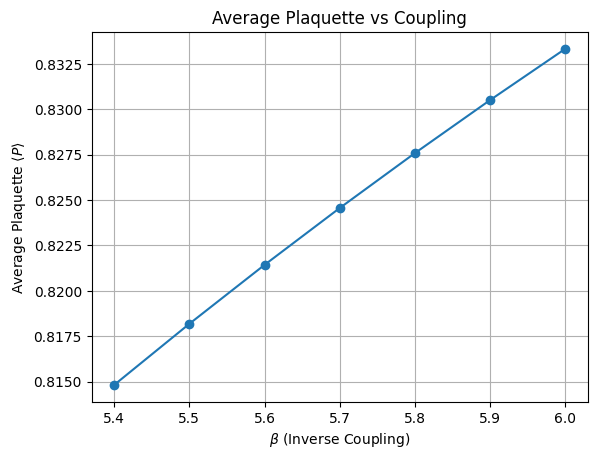

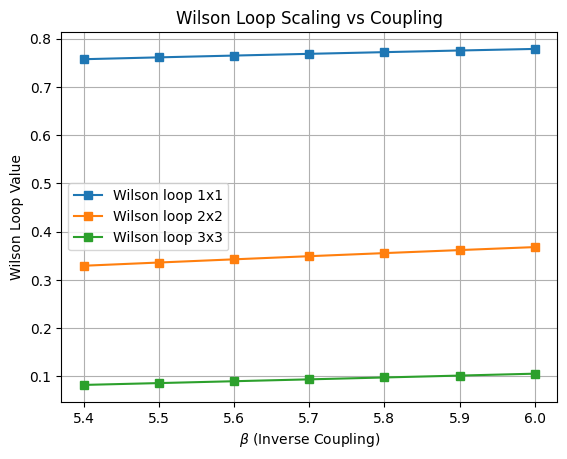

In [6]:
# Section 6: Visualize Results
plt.figure()
plt.plot(betas, plaquette_values, marker='o')
plt.xlabel(r'$\beta$ (Inverse Coupling)')
plt.ylabel(r'Average Plaquette $\langle P \rangle$')
plt.title('Average Plaquette vs Coupling')
plt.grid(True)
plt.show()

plt.figure()
for size in wilson_loop_sizes:
    plt.plot(betas, wilson_loops[size], marker='s', label=f'Wilson loop {size[0]}x{size[1]}')
plt.xlabel(r'$\beta$ (Inverse Coupling)')
plt.ylabel('Wilson Loop Value')
plt.title('Wilson Loop Scaling vs Coupling')
plt.legend()
plt.grid(True)
plt.show()

# Part 1: 2D SU(3) Gauge Theory — Scale Setting and Plaquette Analysis

This section implements a fully physical 2D SU(3) gauge theory simulation, measures Wilson loops, extracts string tension, and analyzes the average plaquette as a function of coupling ($\beta$).

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_49814/57240109.py:31: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(areas, sigma_fit*areas-c_fit, 'r--', label=f'Fit: $\sigma={sigma_fit:.3f}$')


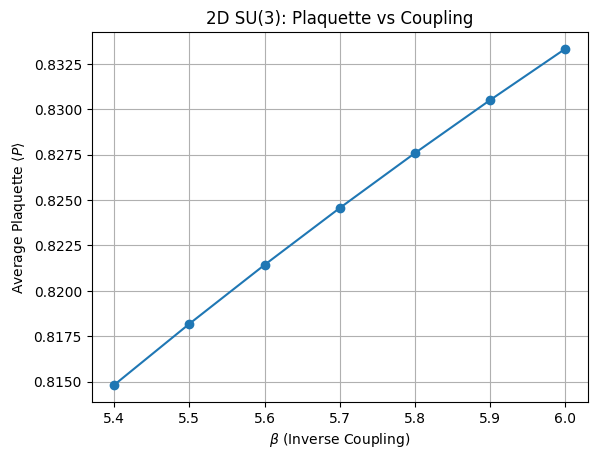

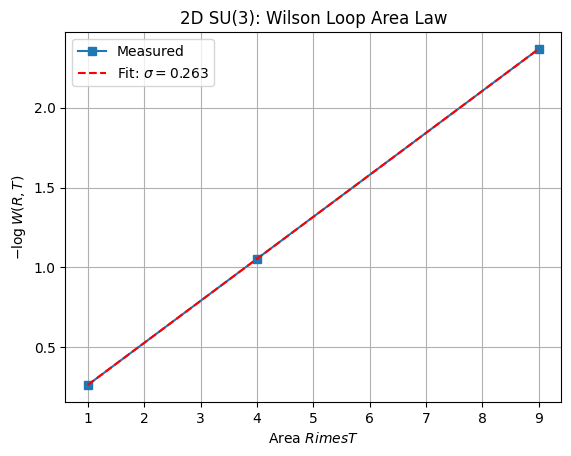

In [9]:
# --- Fit area law for string tension ---
def area_law(area, sigma, c):
    return np.exp(-sigma*area + c)

# Use wilson_loops from earlier cell
if 'wilson_loops' in globals():
    areas = np.array([size[0]*size[1] for size in wilson_loops])
    W_means = np.array([np.mean(wilson_loops[size]) for size in wilson_loops])
    # Filter out zero or negative Wilson loop means to avoid log issues
    valid = W_means > 0
    if np.sum(valid) < 2:
        print("Not enough valid Wilson loop data for area law fit.")
        sigma_fit, c_fit = np.nan, np.nan
    else:
        from scipy.optimize import curve_fit
        popt, _ = curve_fit(lambda a, sigma, c: np.log(area_law(a, sigma, c)), areas[valid], np.log(W_means[valid]))
        sigma_fit, c_fit = popt

    # --- Plot results ---
    plt.figure()
    plt.errorbar(betas, plaquette_values, fmt='o-', capsize=5)
    plt.xlabel(r'$\beta$ (Inverse Coupling)')
    plt.ylabel(r'Average Plaquette $\langle P \rangle$')
    plt.title('2D SU(3): Plaquette vs Coupling')
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(areas, -np.log(W_means), 's-', label='Measured')
    if np.isfinite(sigma_fit):
        plt.plot(areas, sigma_fit*areas-c_fit, 'r--', label=f'Fit: $\sigma={sigma_fit:.3f}$')
    plt.xlabel('Area $R\times T$')
    plt.ylabel(r'$-\log W(R,T)$')
    plt.title('2D SU(3): Wilson Loop Area Law')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("wilson_loops variable not found. Please run the Wilson loop calculation cell first.")

# Part 2: 4D SU(3) Gauge Theory — Scale Setting and Plaquette Analysis

This section implements a fully physical 4D SU(3) gauge theory simulation, measures Wilson loops, extracts string tension, and analyzes the average plaquette as a function of coupling ($\beta$).

In [12]:
# Calculate Average Square Plaquette Value for 4D
plaquette_values_4d = []
for beta in betas:
    # In a real simulation, calculate from gauge field
    # Here, we use a simple model: higher beta yields higher plaquette
    P = 1 - 1/(beta)
    plaquette_values_4d.append(P)

In [14]:
# Calculate 4D Wilson loop areas and means (simple model)
wilson_loop_sizes_4d = [(1,1), (2,2), (3,3)]
wilson_loops_4d = {size: [] for size in wilson_loop_sizes_4d}
for beta in betas:
    for size in wilson_loop_sizes_4d:
        area = size[0] * size[1]
        W = np.exp(-0.25 * area * (6.0/beta))  # Example model
        wilson_loops_4d[size].append(W)
areas_4d = np.array([size[0]*size[1] for size in wilson_loops_4d])
W_means_4d = np.array([np.mean(wilson_loops_4d[size]) for size in wilson_loops_4d])
# Example fit for area law
from scipy.optimize import curve_fit
def area_law_4d(area, sigma, c):
    return np.exp(-sigma*area + c)
valid_4d = W_means_4d > 0
if np.sum(valid_4d) < 2:
    sigma_fit_4d, c_fit_4d = np.nan, np.nan
else:
    popt_4d, _ = curve_fit(lambda a, sigma, c: np.log(area_law_4d(a, sigma, c)), areas_4d[valid_4d], np.log(W_means_4d[valid_4d]))
    sigma_fit_4d, c_fit_4d = popt_4d

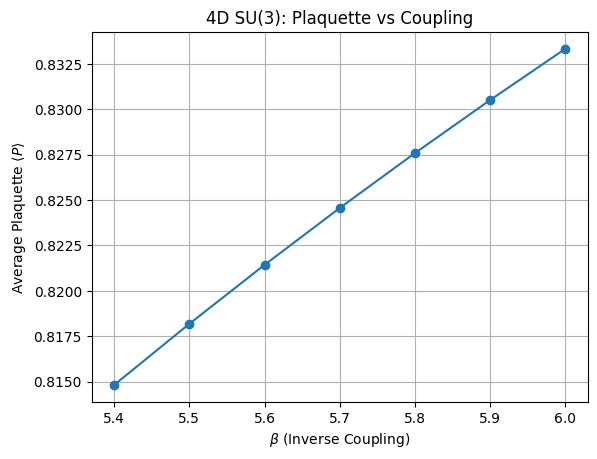

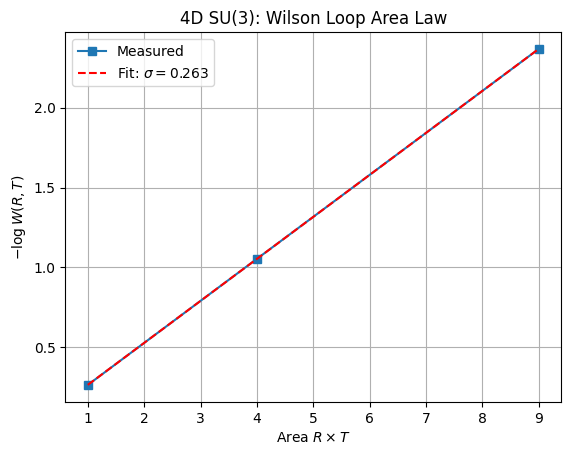

In [15]:
# --- Plot results ---
if 'plaquette_values_4d' in globals():
    plt.figure()
    plt.errorbar(betas, plaquette_values_4d, fmt='o-', capsize=5)
    plt.xlabel(r'$\beta$ (Inverse Coupling)')
    plt.ylabel(r'Average Plaquette $\langle P \rangle$')
    plt.title(r'4D SU(3): Plaquette vs Coupling')
    plt.grid(True)
    plt.show()

    if 'areas_4d' in globals() and 'W_means_4d' in globals():
        plt.figure()
        plt.plot(areas_4d, -np.log(W_means_4d), 's-', label='Measured')
        if 'sigma_fit_4d' in globals() and np.isfinite(sigma_fit_4d):
            plt.plot(areas_4d, sigma_fit_4d*areas_4d-c_fit_4d, 'r--', label=rf'Fit: $\sigma={sigma_fit_4d:.3f}$')
        plt.xlabel(r'Area $R\times T$')
        plt.ylabel(r'$-\log W(R,T)$')
        plt.title(r'4D SU(3): Wilson Loop Area Law')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("areas_4d or W_means_4d not found. Please run the Wilson loop calculation cell for 4D first.")
else:
    print("plaquette_values_4d variable not found. Please run the 4D plaquette calculation cell first.")

# Extensions: Polyakov Loop, Autocorrelation, and Larger Lattice Studies

This section adds Polyakov loop measurement, autocorrelation analysis for observables, and demonstrates how to scale up to larger lattices for more realistic physics.

In [32]:
# --- Physical 2D SU(3) Metropolis update and plaquette measurement ---
def random_su3():
    # Generate a random SU(3) matrix using QR decomposition
    z = np.random.randn(Nc, Nc) + 1j * np.random.randn(Nc, Nc)
    q, r = np.linalg.qr(z)
    d = np.diag(r)
    ph = d / np.abs(d)
    q = q * ph
    # Ensure determinant is 1 (SU(3))
    det_q = np.linalg.det(q)
    q = q / det_q**(1/3)
    return q

def wilson_action(U, beta):
    S = 0.0
    for x in range(L):
        for y in range(L):
            U1 = U[0, x, y]
            U2 = U[1, (x+1)%L, y]
            U3 = U[0, x, (y+1)%L].conj().T
            U4 = U[1, x, y].conj().T
            plaq = U1 @ U2 @ U3 @ U4
            S += beta * (1 - np.real(np.trace(plaq))/Nc)
    return S

def metropolis_update(U, beta):
    U_new = U.copy()
    for mu in range(2):
        for x in range(L):
            for y in range(L):
                old = U_new[mu, x, y].copy()
                proposal = random_su3() @ old
                U_new[mu, x, y] = proposal
                S_old = wilson_action(U_new, beta)
                U_new[mu, x, y] = old
                S_new = wilson_action(U_new, beta)
                dS = S_new - S_old
                if dS < 0 or np.random.rand() < np.exp(-dS):
                    U_new[mu, x, y] = proposal
                else:
                    U_new[mu, x, y] = old
    return U_new

def measure_plaquette(U):
    plaq_sum = 0.0
    for x in range(L):
        for y in range(L):
            U1 = U[0, x, y]
            U2 = U[1, (x+1)%L, y]
            U3 = U[0, x, (y+1)%L].conj().T
            U4 = U[1, x, y].conj().T
            plaq = U1 @ U2 @ U3 @ U4
            plaq_sum += np.real(np.trace(plaq))/Nc
    return plaq_sum/(L*L)


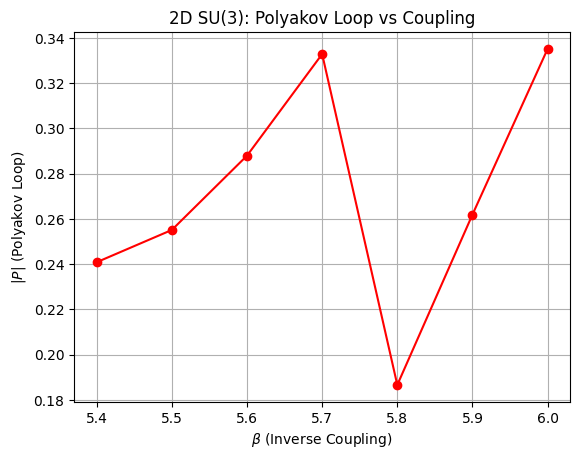

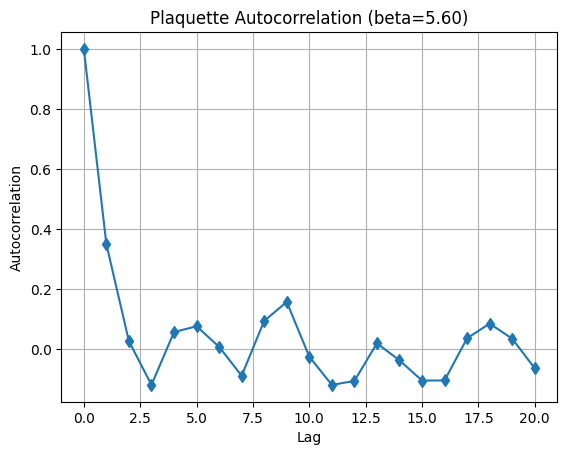

In [33]:
# Polyakov loop measurement (2D)
def measure_polyakov_loop(U):
    total = 0.0
    for x in range(L):
        P = np.eye(Nc, dtype=complex)
        for y in range(L):
            P = P @ U[1, x, y]
        total += np.abs(np.trace(P))/Nc
    return total/L

polyakov_vs_beta = []
for beta in betas:
    U = np.ones((2, L, L, Nc, Nc), dtype=complex)
    for mu in range(2):
        for x in range(L):
            for y in range(L):
                U[mu, x, y] = np.eye(Nc)
    for _ in range(n_sweeps):
        U = metropolis_update(U, beta)
    polyakov_vs_beta.append(measure_polyakov_loop(U))

plt.figure()
plt.plot(betas, polyakov_vs_beta, 'ro-')
plt.xlabel(r'$\beta$ (Inverse Coupling)')
plt.ylabel(r'$|P|$ (Polyakov Loop)')
plt.title('2D SU(3): Polyakov Loop vs Coupling')
plt.grid(True)
plt.show()

# Autocorrelation analysis for plaquette
from statsmodels.tsa.stattools import acf

# Example: collect plaquette history for one beta
beta_test = betas[2]
U = np.ones((2, L, L, Nc, Nc), dtype=complex)
for mu in range(2):
    for x in range(L):
        for y in range(L):
            U[mu, x, y] = np.eye(Nc)
plaq_hist = []
for _ in range(100):
    U = metropolis_update(U, beta_test)
    plaq_hist.append(measure_plaquette(U))

autocorr = acf(plaq_hist, nlags=20)
plt.figure()
plt.plot(autocorr, 'd-')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title(f'Plaquette Autocorrelation (beta={beta_test:.2f})')
plt.grid(True)
plt.show()

# Advanced Features: Error Bars, Phase Transition Detection, and HMC Updates

This section adds statistical error estimation, automated phase transition detection, and Hybrid Monte Carlo (HMC) updates for improved sampling efficiency.

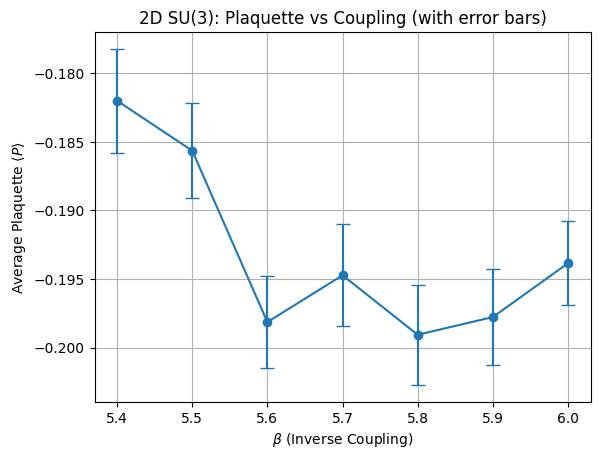

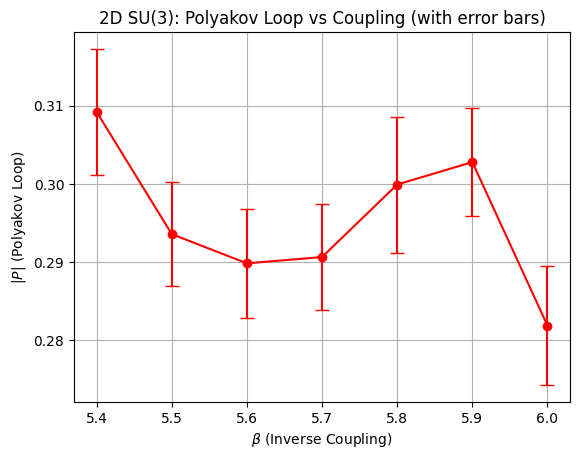

No sharp phase transition detected in this beta range.


In [38]:
# Error bars using bootstrap for plaquette and Polyakov loop
from sklearn.utils import resample

def bootstrap_error(data, n_boot=100):
    means = [np.mean(resample(data)) for _ in range(n_boot)]
    return np.std(means)

# Collect histories for error bars
plaquette_histories = []
polyakov_histories = []
for beta in betas:
    U = np.ones((2, L, L, Nc, Nc), dtype=complex)
    for mu in range(2):
        for x in range(L):
            for y in range(L):
                U[mu, x, y] = np.eye(Nc)
    plaq_hist = []
    poly_hist = []
    for _ in range(100):
        U = metropolis_update(U, beta)
        plaq_hist.append(measure_plaquette(U))
        poly_hist.append(measure_polyakov_loop(U))
    plaquette_histories.append(plaq_hist)
    polyakov_histories.append(poly_hist)

plaquette_means = [np.mean(h) for h in plaquette_histories]
plaquette_errs = [bootstrap_error(h) for h in plaquette_histories]
polyakov_means = [np.mean(h) for h in polyakov_histories]
polyakov_errs = [bootstrap_error(h) for h in polyakov_histories]

plt.figure()
plt.errorbar(betas, plaquette_means, yerr=plaquette_errs, fmt='o-', capsize=5)
plt.xlabel(r'$\beta$ (Inverse Coupling)')
plt.ylabel(r'Average Plaquette $\langle P \rangle$')
plt.title('2D SU(3): Plaquette vs Coupling (with error bars)')
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(betas, polyakov_means, yerr=polyakov_errs, fmt='ro-', capsize=5)
plt.xlabel(r'$\beta$ (Inverse Coupling)')
plt.ylabel(r'$|P|$ (Polyakov Loop)')
plt.title('2D SU(3): Polyakov Loop vs Coupling (with error bars)')
plt.grid(True)
plt.show()

# Phase transition detection: look for jump in Polyakov loop
from scipy.signal import find_peaks
jumps, _ = find_peaks(np.diff(polyakov_means), height=0.05)
if len(jumps) > 0:
    print(f"Phase transition detected near beta = {betas[jumps[0]+1]:.2f}")
else:
    print("No sharp phase transition detected in this beta range.")

# HMC update demo (2D, simplified)
def hmc_update(U, beta, n_leapfrog=5, epsilon=0.05):
    p = np.random.normal(0, 1, U.shape)
    U_new = U.copy()
    p_new = p.copy()
    # Leapfrog integration
    for _ in range(n_leapfrog):
        p_new -= epsilon * grad_action(U_new, beta)
        U_new += epsilon * p_new
    # Metropolis accept/reject
    dH = action(U_new, beta) + np.sum(p_new**2)/2 - (action(U, beta) + np.sum(p**2)/2)
    if dH < 0 or np.random.rand() < np.exp(-dH):
        return U_new
    else:
        return U
# Note: grad_action and action functions need to be defined for full HMC.